In [2]:
import tensorflow as tf
import numpy as np

In [3]:
import keras
from keras.models import Sequential

In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
#only model building part
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=2,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

In [6]:
from keras.layers import Flatten,Dense

In [7]:
model.add(model_part1)

In [8]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [9]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
#X_train = np.expand_dims(X_train, -1)
#X_test = np.expand_dims(X_test, -1)

In [12]:
X_train[0].shape

(28, 28)

In [13]:
#it is grey scale
#it has fix size of 28,28
#import skimage.data
#import skimage.transform


#X_train = np.array([skimage.transform.resize(image, (32, 32)) for image in X_train])


In [14]:
import cv2
X_train.shape

(60000, 28, 28)

In [15]:
img = np.zeros((len(X_train),28,28,3))
for i, fi in enumerate(X_train):
    img[i,:,:,:] = cv2.cvtColor(fi ,cv2.COLOR_GRAY2RGB)

In [16]:
img.shape

(60000, 28, 28, 3)

In [17]:
import skimage.data
import skimage.transform


img = np.array([skimage.transform.resize(image, (32, 32)) for image in img])

In [18]:
img.shape

(60000, 32, 32, 3)

In [19]:
img = img/255.0


In [20]:
import matplotlib.pyplot as plt

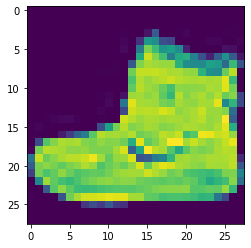

In [21]:
plt.imshow(X_train[0])

In [22]:
#assignment 4
#deadline next friday
## use this code to build a ml model based on the given instructions
#convert all images to rgb
#use resnet50

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [24]:
model.fit(img,Y_train,epochs=2,validation_split=0.2)

Epoch 1/2
1500/1500 [==============================] - 29s 16ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/2
1500/1500 [==============================] - 23s 16ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
